# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 

---
---
# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    OpenMM (https://openmm.org/)
2.    PyTraj (https://amber-md.github.io/pytraj/latest/index.html)
3.    py3Dmol (https://pypi.org/project/py3Dmol/)
4.    Numpy (https://numpy.org/)
5.    Matplotlib (https://matplotlib.org/)
8.    AmberTools (https://ambermd.org/AmberTools.php)

Load libraries in conda enviroment:

conda install -c conda-forge openmm 

conda install -y -q -c conda-forge openmm=7.6 python=3.7 pdbfixer

conda install -c conda-forge ambertools

conda install -c ambermd pytraj 

conda install -c conda-forge biopandas

conda install -c conda-forge mdanalysis

conda install -c conda-forge py3dmol

conda install -c conda-forge jupyterlab

conda install -c conda-forge mdtraj

conda install -c conda-forge nglview



In [1]:
import numpy as np
import py3Dmol
import platform
import scipy.cluster.hierarchy

from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load dependencies

import os
import sys
from simtk import openmm as mm

import openmm as mm
from openmm import *
from openmm.app import *
from openmm.unit import *

import numpy as np
import py3Dmol

#import pytraj as pt
import platform
import scipy.cluster.hierarchy

from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

from scipy.interpolate import griddata
from scipy.optimize import curve_fit
import seaborn as sb
from statistics import mean, stdev
#from pytraj import matrix
from matplotlib import colors
from IPython.display import set_matplotlib_formats

import MDAnalysis as mda
import mdtraj as md


In [3]:
from __future__ import print_function
from IPython.display import set_matplotlib_formats


In [4]:
import mdtraj as md
traj = md.load('butane_sim.dcd', top='butane.pdb')

In [5]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [6]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x7fc9e8507950>

In [7]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


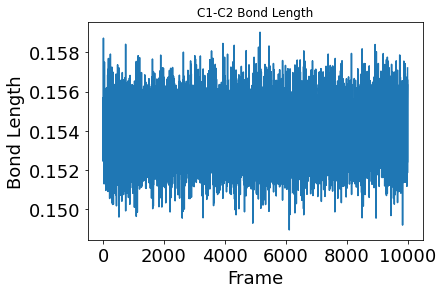

In [8]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C1C2bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

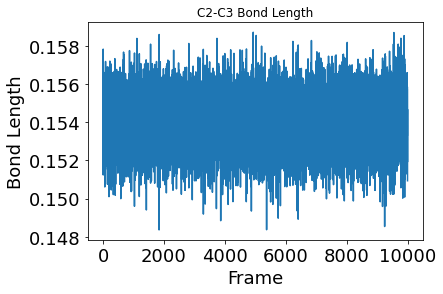

In [9]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C2C3bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

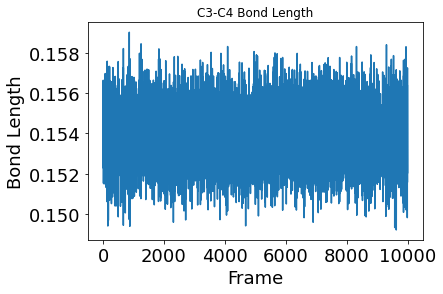

In [10]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C3C4bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

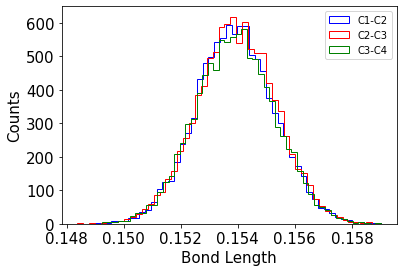

In [11]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

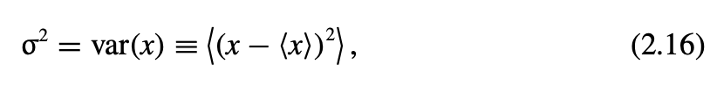

In [12]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######


In [13]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)
print("C1-C2 var:",C1C2var,"C2-C3 var:",C2C3var,"C3-C4 var:",C3C4var)
print("C1-C2 std:",C1C2std,"C2-C3 std:",C2C3std,"C3-C4 std:",C3C4std)

C1-C2 var: 1.877708e-06 C2-C3 var: 1.9097258e-06 C3-C4 var: 1.9028457e-06
C1-C2 std: 0.001370294848967931 C2-C3 std: 0.0013819282993662366 C3-C4 std: 0.0013794367417696333


In [14]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15391365 variance: 1.877708e-06 std-dev: 0.0013702948
C2-C3 average: 0.15394597 variance: 1.9097258e-06 std-dev: 0.0013819283
C3-C4 average: 0.15390207 variance: 1.9028457e-06 std-dev: 0.0013794367


***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


Line Parameters: [-0.0775146   0.16587652]


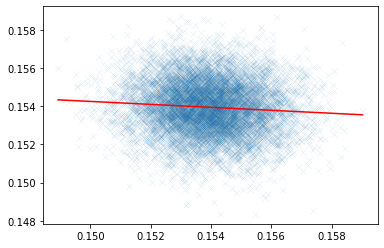

r2: -0.07686206044416949
Line Parameters: [0.00388825 0.15330362]


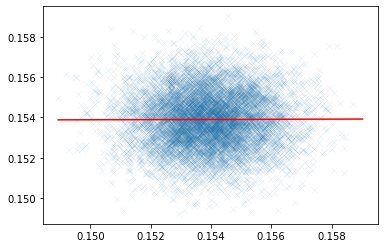

r2: 0.0038624771537713394


In [15]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)

#######SOLUTION###########


line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

**Homework Question:  Why does one pair of these bonds appear more correlated than the other?**

Because of symmetry, C1C2 and C3C4 bonds are equivalent.

***Class Activity*** 

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

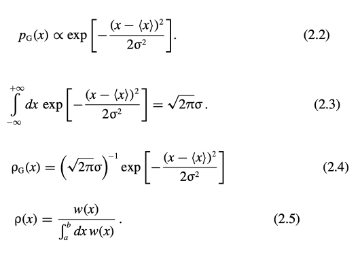
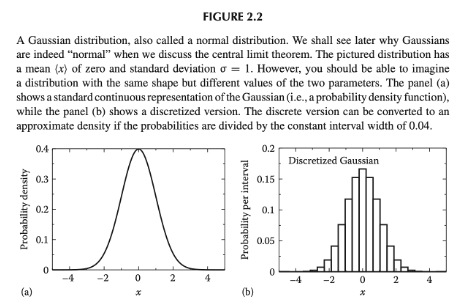

***Homework Porblem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

a: 0.18761157866951292 x0: 0.1538894668943878 fit_sigma: -0.0013787523302921205
a: 0.18574440385232668 x0: 0.15395702008504444 fit_sigma: -0.0013965709822283917
a: 0.1853601051719883 x0: 0.15388302289899353 fit_sigma: 0.001400882975052254


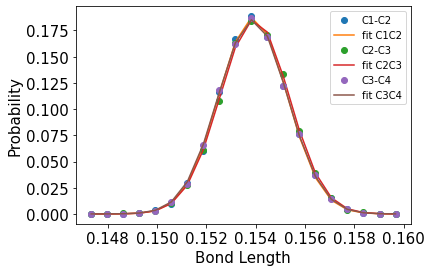

In [16]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####SOLUTION####

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

C2C3_density,centers=histogram_bincenters(C2C3bondlength,0.147,0.160,20)
C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

C3C4_density,centers=histogram_bincenters(C3C4bondlength,0.147,0.160,20)
C3C4_fit,C3C4_fit_params=fit_gauss(centers,C3C4_density)


plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')
plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')
plt.plot(centers, C3C4_density, 'o', label='C3-C4')
plt.plot(centers, C3C4_fit, '-', label='fit C3C4')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


a: 0.18761157866951292 x0: 0.1538894668943878 fit_sigma: -0.0013787523302921205


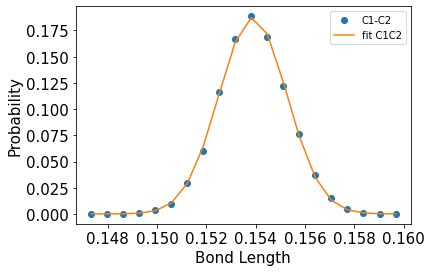

In [17]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit



#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


**Homework Problem #2: convert these probability distributions to culmulative distribution functions**

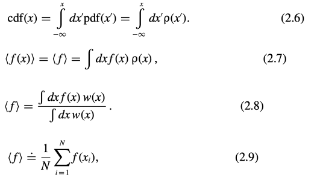

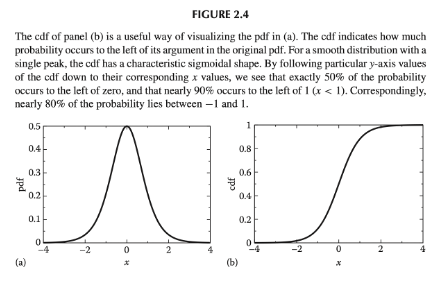

In [18]:
#ADD CODE FOR CDFs HERE#

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


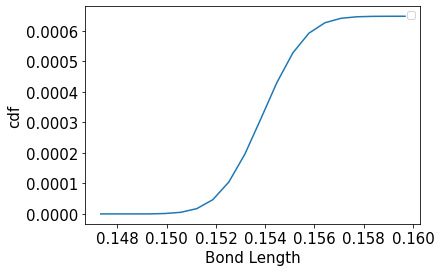

In [19]:
from scipy.integrate import quad
def cdf(bl,para):
    I = quad(lambda x: (para[0]*np.exp(-(x-para[1])**2/(2*para[2]**2))), -np.Inf, bl)
    return I[0]
def cdf2(i):
    return cdf(i,C1C2_fit_params)
C1C2_cdf=list(map(cdf2,centers))
plt.plot(centers, C1C2_cdf)

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('cdf', size=15)
plt.yticks(size=15)
plt.show()

**Homework Problem #3: Lets draw some different some random frames from our trajectory (for example 10,100, and 1000),  calculate the probability distribution functions for 5 of these random samples, and fit  gaussians to these probability distirbution functions***
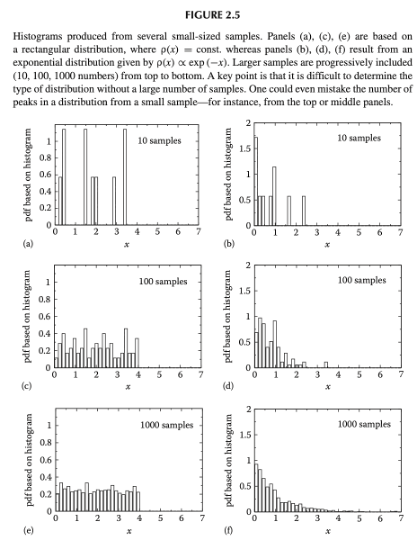

In [20]:
#ADD CODE FOR Random SAMPLES HERE#
#Draw 10,100,1000 random samples of a bond angle,
import random
sample10=random.choices(C1C2bondlength,k=10)
sample100=random.choices(C1C2bondlength,k=100)
sample1000=random.choices(C1C2bondlength,k=1000)

a: 0.1902197395428494 x0: 0.1540614958768668 fit_sigma: -0.0014354773542059158


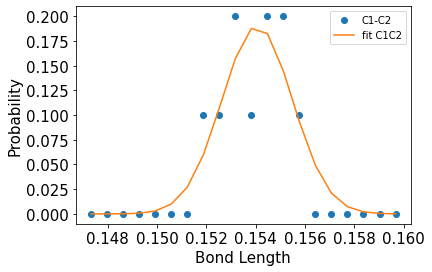

In [21]:
C1C2_density,centers=histogram_bincenters(sample10,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

a: 0.2188512327649295 x0: 0.1540765384786011 fit_sigma: -0.0011373907152289183


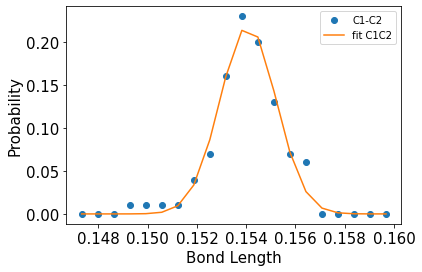

In [22]:
C1C2_density,centers=histogram_bincenters(sample100,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

a: 0.18812170940291342 x0: 0.15398488340592614 fit_sigma: 0.0013885561357624093


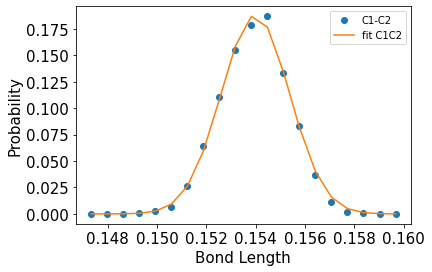

In [23]:
C1C2_density,centers=histogram_bincenters(sample1000,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their time course and their histograms.  Find a good way to visualize the C-C-C-C dihedral angle 

(10000, 2)


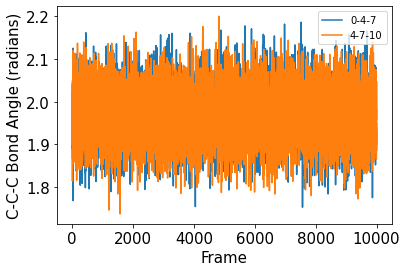

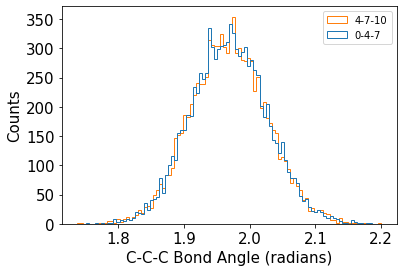

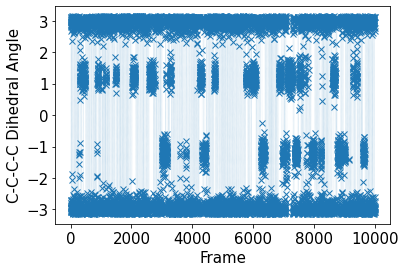

In [24]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)
print(np.shape(ang))
plt.plot(ang,label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C Bond Angle (radians)', size=15)
plt.yticks(size=15)
plt.show()

plt.show()
plt.clf()
plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

#plt.plot(CCCC_torsion)
plt.plot(CCCC_torsion,marker='x',linewidth=.01)
#plt.xlim(0,2000)
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C-C Dihedral Angle', size=15)
plt.yticks(size=15)
plt.show()



***Homework Challenge Question:  Can you estimate the lifetime of the higher energy C-C-C-C dihedral states?*****

In [25]:
####Challenge Question Can you estimate the lifetime of the higher energy C-C-C-C dihedral states####

**Class Activity: Are The Bond Angles and Dihedral Angle Correlated?**

r2: 0.01752623059471529
[3.77982783e-04 1.96838814e+00]


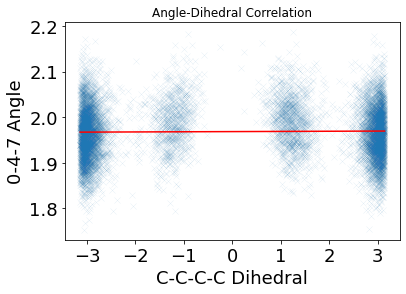

In [26]:
#Are the bond angle and dihedral correlated?

ang1=ang[:,0]
ang2=ang[:,1]

plt.scatter(CCCC_torsion,ang1,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],ang1,1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('0-4-7 Angle', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()


#plt.scatter(ang1[1:-1:10],ang2[1:-1:10])
#r=np.corrcoef(ang1, ang2)
#print("Angle Correlation r^2:",r[0,1])


r2: -0.008685235049480287
[-1.87503833e-04  1.96771691e+00]


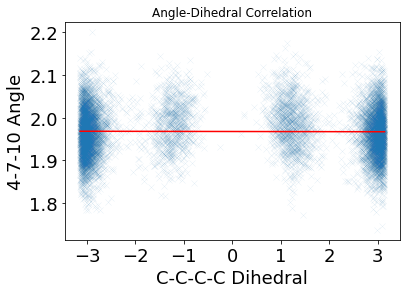

In [27]:
#Are the bond angle and dihedral correlated?

ang1=ang[:,0]
ang2=ang[:,1]

plt.scatter(CCCC_torsion,ang2,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], ang2)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],ang2,1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('4-7-10 Angle', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()


#plt.scatter(ang1[1:-1:10],ang2[1:-1:10])
#r=np.corrcoef(ang1, ang2)
#print("Angle Correlation r^2:",r[0,1])


**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** 

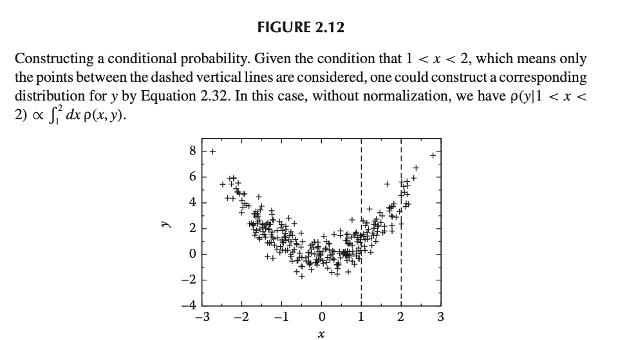

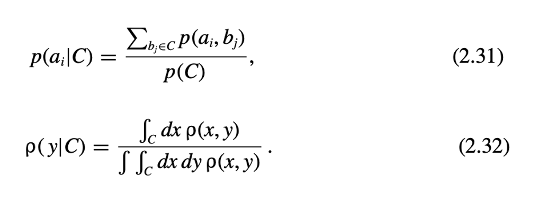

#Homework problem 3##
express the relationsip between these 0-4-7 angle and dihedral angle using histograms and conditional probabilities

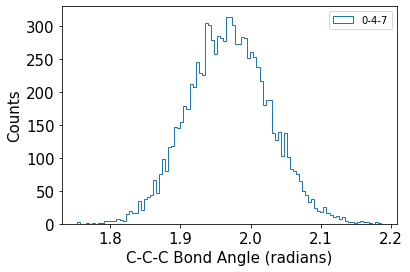

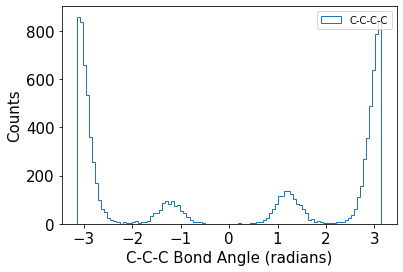

<Figure size 432x288 with 0 Axes>

In [29]:
plt.hist(ang1,bins=100,histtype='step',label=['0-4-7'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()

plt.hist(CCCC_torsion,bins=100,histtype='step',label=['C-C-C-C'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()

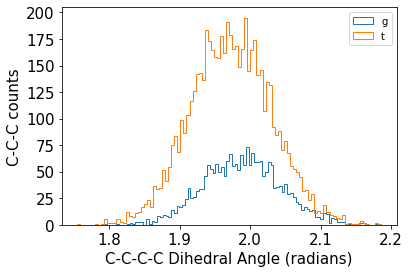

<Figure size 432x288 with 0 Axes>

In [30]:
newlist=ang1[((-2 < CCCC_torsion[:,0]) & (CCCC_torsion[:,0] < 0)) | ((0 < CCCC_torsion[:,0]) & (CCCC_torsion[:,0] < 2))]
plt.hist(newlist,bins=100,histtype='step',label='g')
newlist=ang1[(-2 < CCCC_torsion[:,0]) | (CCCC_torsion[:,0] > 2)]
plt.hist(newlist,bins=100,histtype='step',label='t')
plt.legend()
plt.xlabel('C-C-C-C Dihedral Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()
    

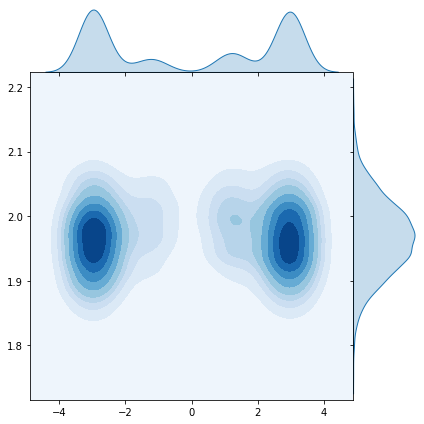

<Figure size 432x288 with 0 Axes>

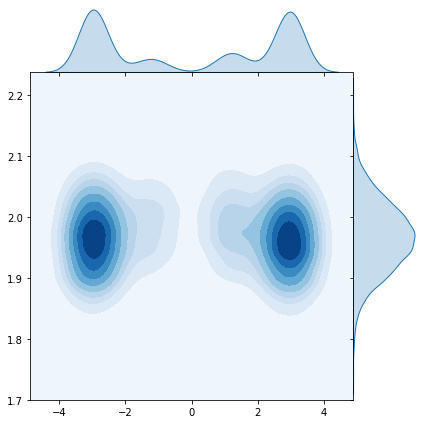

In [31]:
import seaborn as sns

sns.jointplot(x=CCCC_torsion[:,0],y=ang1,kind = 'kde', space=0, fill=True, thresh=0, cmap='Blues')
plt.show()

plt.clf()
# 2d Histagram of C1-C2-C3-C4 dihedral and C2-C3-C4 angle
sns.jointplot(x=CCCC_torsion[:,0],y=ang2,kind = 'kde', space=0, fill=True, thresh=0, cmap='Blues')
plt.show()

**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

[0.00000000e+00 2.00020002e+00 4.00040004e+00 ... 1.99959996e+04
 1.99979998e+04 2.00000000e+04]


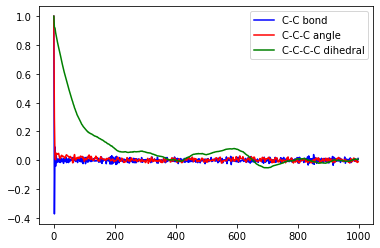

In [32]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

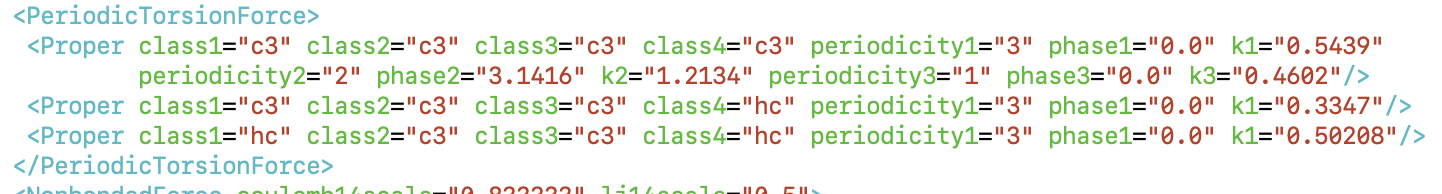

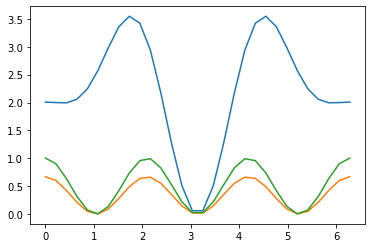

In [33]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)


In [34]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  Why isn't it always the same?

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

In [35]:
####Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Consider CCCC vs. [8,7,4,5]


#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]


In [36]:
#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

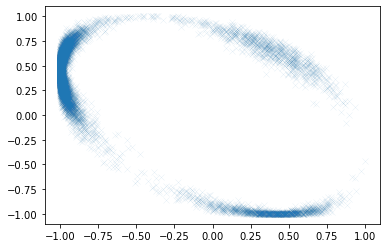

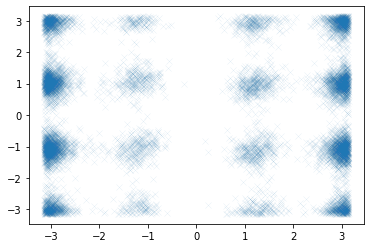

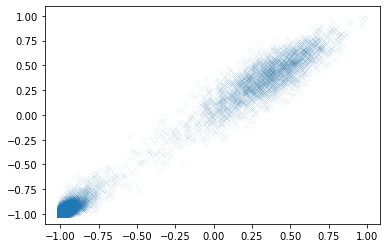

In [37]:
####Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Consider CCCC vs. [8,7,4,5]
plt.scatter(np.cos(HCCH_torsions[:,0]),np.cos(HCCH_torsions[:,1]),marker='x',linewidth=0.04)
plt.show()
plt.clf()

#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]
plt.scatter(CCCC_torsion,HCCH_torsions[:,14],marker='x',linewidth=0.04)
plt.show()
plt.clf()

plt.scatter(np.cos(CCCC_torsion),np.cos(HCCH_torsions[:,0]),marker='x',linewidth=0.04)
plt.show()

CCCC vs. [8,7,4,5]
These two torsion angles are highly correlated. Because H8, C10 are linked to C7, H5, C0 are linked to C4. When H8 rotates, C10 will rotate according to the movement of H8. 

CCCC vs. [12,10,7,9]
These two torsion angles are hardly correlated. Because the centers of the torsion pair are 4, 7 and 10,7 respectively.  

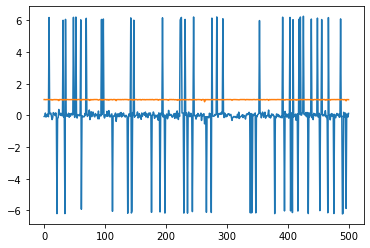

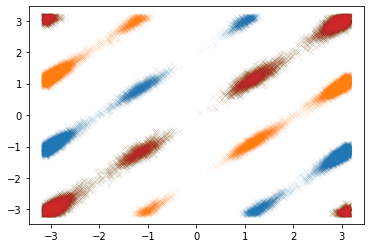

In [38]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT
#plt.scatter(CCCC_torsion,HCCH_torsions[:,1],marker='x',linewidth=0.04)
diff=CCCC_torsion[:,0]-HCCH_torsions[:,3]
plt.plot(diff[::20])
plt.plot(np.cos(diff[::20]))
plt.show()
plt.clf()

plt.scatter(HCCH_torsions[:,0],HCCH_torsions[:,1],marker='x',linewidth=0.04)
plt.scatter(HCCH_torsions[:,0],HCCH_torsions[:,2],marker='x',linewidth=0.04)
plt.scatter(HCCH_torsions[:,0],HCCH_torsions[:,3],marker='x',linewidth=0.04)
plt.scatter(HCCH_torsions[:,0],HCCH_torsions[:,3],marker='x',linewidth=0.04)

CCCC vs. [8,7,4,5] changes together, the offset is near 0.

In [39]:
#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME

In [40]:
#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME
CCCC_E=CCCC_torsionE(CCCC_torsion[:,0])
HCCH_E=HCCH_torsionE(HCCH_torsions)
CCCH_E=CCCH_torsionE(CCCH_torsions)
#plt.scatter(CCCH_torsions[:,0],CCCH_E[:,0])
HCCH_totalE=np.sum(HCCH_E,axis=1)
CCCH_totalE=np.sum(CCCH_E,axis=1)
Total_TorsionE=CCCC_E+HCCH_totalE+CCCH_totalE

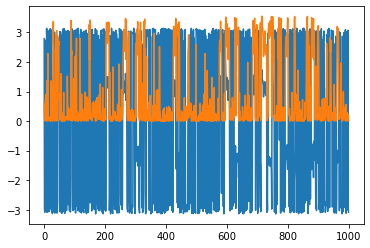

In [41]:
#Compare the time course of CCCC torsion with its energy 
#Interpret what you are seeing in terms of conformations and energies

CCCC_E=CCCC_torsionE(CCCC_torsion[:,0])
plt.plot(CCCC_torsion[:,0][::10])
plt.plot(CCCC_E[::10])

#CCCH_e=CCCH_torsion(rad_ang)
#HCCH_e=HCCH_torsion(rad_ang)

Plot The Total Torsion Energy As a Function of the C-C-C-C Dihedral Angle - Compare your plot Energetic Torsion Barriers from Cramer.  How Can you explain the Difference?

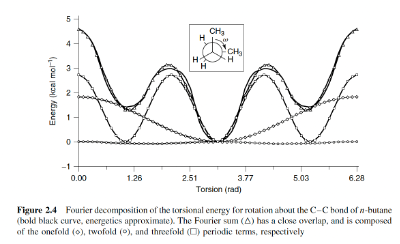

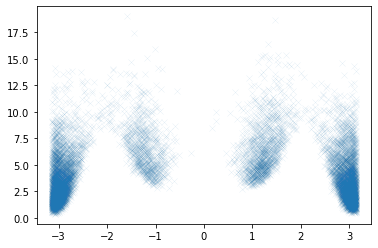

In [42]:
#Solution
plt.scatter(CCCC_torsion[:,0],Total_TorsionE,marker='x',linewidth=.04)

The energy barrier trend is similar to what is predicted by Cramer. However, because of thermodynamic fluctuation and random movement of H, the total torsion energy will be higher than the curve predicted by Cramer. The highest peak disappears because the high energy barrier results in few conformation in the peak region.

***Homework Problem #6: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution***


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

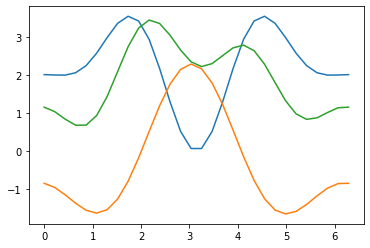

In [44]:
###SOLUTION#####

def CCCC_cor(angle):
 e1=calc_torsion_energy(angle,-2.16,1,-0.4)
 e2=calc_torsion_energy(angle,0.8,1,-1)
 e3=calc_torsion_energy(angle,1.04,2,-0.2)
 return e1+e2+e3

CCCC_corE=CCCC_cor(rad_ang)
CCCC_e=CCCC_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCC_corE)
plt.plot(rad_ang,CCCC_corE+CCCC_e)


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

***Homework Problem #7: Attempt to run a new MD Simulation with your modified torsion potential***

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [52]:
###SOLUTION###
#ONCE YOU HAVE FOUND SOME TORSION CORRECTIONS RUN A NEW SIMULATION 
#Make a new force field file 'butane.gaff2.cor1.xml'
from openmm import app
import openmm as mm
from simtk import unit

pdb = app.PDBFile('butane.pdb')
forcefield = app.ForceField('butane.gaff2.cor1.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
# 0.002ps per step
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

print('Minimizing...')
st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")
simulation.minimizeEnergy(maxIterations=100)
st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

from sys import stdout
print('Equilibrating...')
simulation.reporters.append(app.StateDataReporter(stdout, 250, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(298.0*unit.kelvin)
simulation.step(5000)

import time as time
print('Running Production...')
# Begin timer
tinit=time.time()
# Clear simulation reporters
simulation.reporters.clear()
# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 500000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('butanenew_sim.dcd', 100))
# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(20000000)
# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Minimizing...
Potential energy before minimization is 5.797528692127868 kJ/mol
Potential energy after minimization is 5.295784483017486 kJ/mol
Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
250,45.1899280737736,204.6220516751505
500,37.45002557832929,314.6743648576438
750,40.25650148278512,387.79557869652444
1000,35.62020652056067,327.0521730405223
1250,42.91621880164582,291.9109365693323
1500,21.892937358171256,203.8752066058265
1750,31.186009097283343,293.74917204951174
2000,30.003890352301386,334.7218100996995
2250,47.38780218777737,197.07473324144974
2500,71.73535221298687,303.7992212731601
2750,33.717003190455785,185.63997052137958
3000,54.04939813623445,302.4455810514888
3250,47.01850966909831,158.86659779928883
3500,25.600501802159645,303.03194338107267
3750,42.24586491961567,325.8346371953802
4000,57.89729157022071,406.55894107484124
4250,31.23832749168919,225.29799526305817
4500,36.947644132525895,308.001127267903
4750,45.299796636787555,373.8371202850

**Homework Problem #8:  Calculate LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

**Challenge Problem:  Atempt to calculate all LJ interactions for a frame and all frames.  What does lj14scale mean?**


**Challenge Problem #2:  Attempt to calculate all Coulumb interactions for a frame and all frames**

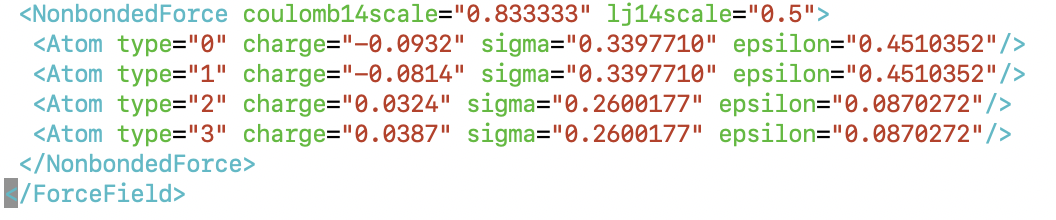




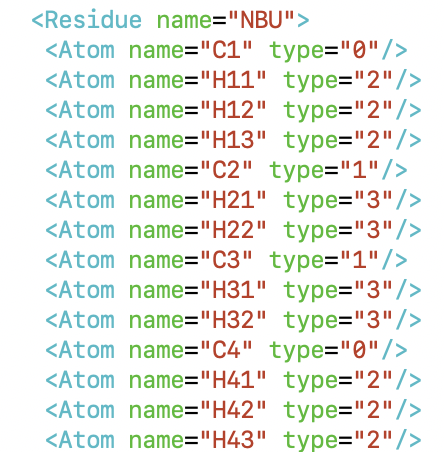

(0.2, 0.8)

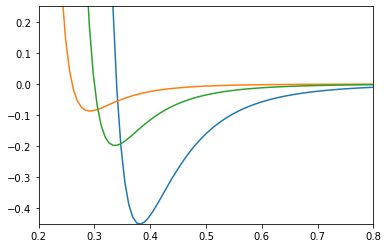

In [69]:
#Calculate LJ and Couloumb Potentionals Here
epC=0.4510352
epH=0.0870272
sigC=0.3397710
sigH=0.2600177
def LJ(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)
def combineep(ep1,ep2):
    return (ep1*ep2)**0.5
def combinesig(sig1,sig2):
    return 0.5*sig1 + 0.5*sig2
rlist = np.linspace(0.1,0.8,100)
LJlistCC=LJ(rlist,combineep(epC,epC),combinesig(sigC,sigC))
LJlistHH=LJ(rlist,combineep(epH,epH),combinesig(sigH,sigH))
LJlistCH=LJ(rlist,combineep(epC,epH),combinesig(sigC,sigH))
plt.plot(rlist,LJlistCC, label='CC')
plt.plot(rlist,LJlistHH, label='HH')
plt.plot(rlist,LJlistCH, label='CH')
plt.ylim(-0.45,0.25)
plt.xlim(0.2,0.8)

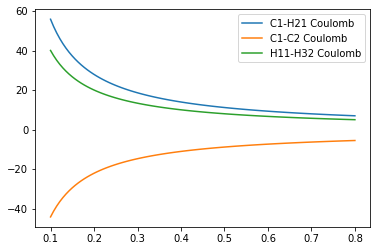

<Figure size 432x288 with 0 Axes>

In [76]:
# Coulumbic potential
# Atom paird: 0-1, 1-2, 2-3
#Adapted Jiaqi's Notebook
c1=-0.0932
c2=-0.0814
c3=0.0324
c4=0.0324

def coulumb(q1,q2,r,ep):
    return (332*q1*q2)/(ep*r)

co1 = coulumb(c1,c2,rlist,combineep(epC,epC))
co2 = coulumb(c2,c3,rlist,combineep(epC,epH))
co3 = coulumb(c3,c4,rlist,combineep(epH,epH))

plt.plot(rlist,co1, label = 'C1-H21 Coulomb')
plt.plot(rlist,co2, label = 'C1-C2 Coulomb')
plt.plot(rlist,co3, label = 'H11-H32 Coulomb')
plt.legend()
plt.show()
plt.clf()